In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv")
data.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


Criando uma coluna para definir 0 como "Não finalizado" e 1 como "Finalizado", passará a ser utilizada no lugar da coluna "Unfinished"

In [3]:
data['finish'] = data.unfinished.map({ 
                                        0 : 1,
                                        1 : 0
                                             }) 
data.head()

,unfinished,expected_hours,price,finish
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


Exclusão da antiga coluna "Unfinished" 

In [4]:
data = data.drop(data.columns[0], axis=1)
data

,expected_hours,price,finish
0,26,192,0
1,88,9015,0
2,89,2577,0
3,42,275,0
4,39,170,0
...,...,...,...
2152,80,7518,1
2153,52,1332,0
2154,40,473,1
2155,75,5324,1


Usando um scatter plot para verificar a relação entre horas esperadas e preço

<AxesSubplot:xlabel='expected_hours', ylabel='price'>

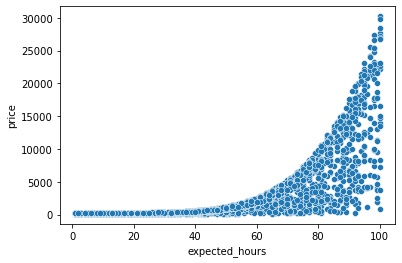

In [5]:
sns.scatterplot(x = 'expected_hours', y = 'price', data = data) 

Usando o campo 'finish' para conseguir identificar aonde se encontra finalizado e não finalizado

<AxesSubplot:xlabel='expected_hours', ylabel='price'>

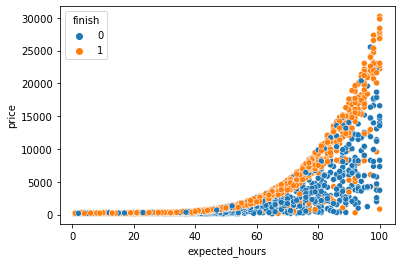

In [6]:
sns.scatterplot(x = 'expected_hours', y = 'price', hue = 'finish', data = data)

Separação de gráficos em "Não finalizados" e "Finalizados"  

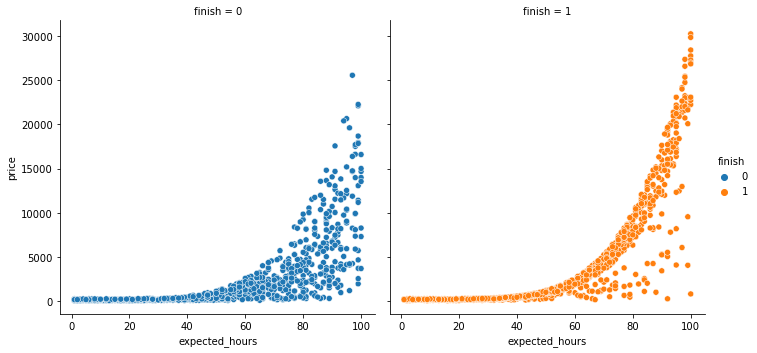

In [7]:
sns.relplot(x = 'expected_hours', y = 'price', hue = 'finish', col = 'finish', data = data)

Divisão das features e do rótulo

In [8]:
x = data.iloc[:, :-1] 
y = data.iloc[:, -1] #label

Importação da biblioteca com escalador, divisor de teste e treino, modelo a ser utilizado e a métrica

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

No sklearn é possível definir a seed para tudo com o numpy random seed

In [10]:
np.random.seed(33) 

Passando os parâmetros para o dividir teste e treino, sendo test_size = porcentagem de usada para teste e stratify o balanceador

In [11]:
pre_train_x, pre_test_x, train_y, test_y = train_test_split(x, y, test_size = 0.30,
                                                                      stratify = y)

Criando uma nova escala e treinar o novo escalador 

In [12]:
scaler = StandardScaler()
scaler.fit(pre_train_x)

StandardScaler()

Tranformar todas as features para nova escala

In [13]:
train_x = scaler.transform(pre_train_x)
test_x = scaler.transform(pre_test_x)

Definir o modelo para treinar as features e os rótulos e fazer a predição

In [14]:
model = SVC(gamma='auto')
model.fit(train_x, train_y)

predict = model.predict(test_x)

Usar a métrica de acurácia 

In [16]:
accuracy = accuracy_score(test_y, predict) * 100
print("A acurácia foi %.2f%%" % accuracy)

A acurácia foi 69.60%


# Decision Boundary

Separar as features em eixo x e y, separando por coluna, ou seja, eixo x: primeira coluna e eixo y: segunda coluna

In [24]:
axis_x = test_x[:,0]
axis_y = test_x[:,1]

Coletar valor mínimo e valor máximo que há em cada eixo

In [26]:
x_min = axis_x.min()
x_max = axis_x.max()
y_min = axis_y.min()
y_max = axis_y.max()

print(x_min, x_max, y_min, y_max)

-1.6940934894305417 1.752767488989567 -0.5936467627061638 5.41705299173714


Escolher a quantidade de pixels

In [27]:
pixels = 100

Entre os valores, é a quantidade de pixels escolhido. O tamanho deles é o valor máximo menos o valor mínimo dividido pela quantidade de pixels.

In [28]:
axis_x2 = np.arange(x_min, x_max, (x_max - x_min) / pixels)
axis_y2 = np.arange(y_min, y_max, (y_max - y_min) / pixels)

Usar o "meshgrid" e o "c_" para concatenar os eixos

In [29]:
x2, y2 = np.meshgrid(axis_x2, axis_y2)

point = np.c_[x2.ravel(), y2.ravel()]

Usar o modelo para prever com os pontos (point) e redimensionar de acordo com o x2 para manter 100 por 100.

In [30]:
Z = model.predict(point)
Z = Z.reshape(x2.shape)

Plotar o gráfico com contorno baseado na mesclagem do x e y, e atribuído o Z para 0 ou 1

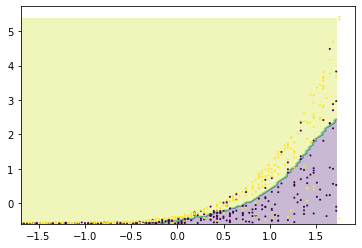

In [31]:
plt.contourf(x2, y2, Z, alpha = 0.3) # alpha seleciona a transparências
plt.scatter(axis_x, axis_y, c = test_y, s = 1) # o "c" define cor e "s" é o size do ponto